In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/0pride/utils/master/training.csv')

print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n", data.nunique())
data.head()

Rows     :  11981
Columns  :  19

Features : 
 ['CUSTOMER_ID', 'COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'LESSTHAN600k', 'CHILD', 'JOB_CLASS', 'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED']

Missing values :   1270

Unique values :  
 CUSTOMER_ID                    11981
COLLEGE                            2
DATA                            6639
INCOME                         10629
OVERCHARGE                       263
LEFTOVER                          86
HOUSE                          10386
LESSTHAN600k                       2
CHILD                              8
JOB_CLASS                          4
REVENUE                          307
HANDSET_PRICE                    770
OVER_15MINS_CALLS_PER_MONTH       25
TIME_CLIENT                      129
AVERAGE_CALL_DURATION             13
REPORTED_SATISFACTION              5
REPORTED_

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


# Cleaning up the data

In [30]:
# Data cleaning up

data['CHURNED'] = data['CHURNED'].replace('LEAVE', 1)
data['CHURNED'] = data['CHURNED'].replace('STAY', 0)
data['COLLEGE'] = data['COLLEGE'].replace('zero', 0)
data['COLLEGE'] = data['COLLEGE'].replace('one', 1)

transform_dict = {'REPORTED_SATISFACTION':{'very_unsat': -2, 'unsat': -1, 'avg': 0, 'sat': 1, 'very_sat': 2}, 
                  'REPORTED_USAGE_LEVEL': {'very_little': -2, 'little': -1, 'avg': 0, 'high': 1, 'very_high': 2},
                  'CONSIDERING_CHANGE_OF_PLAN' : {'never_thought': -2, 'no': -1, 'perhaps': 0, 
                                                  'considering': 1, 'actively_looking_into_it': 2}}
data = data.fillna(method='ffill')

for key in transform_dict.keys():
    data[key] = data[key].map(transform_dict[key])
    
for i in data.keys():
    print(i + ' : ' + str(type(data[i][0]))  + ' : ' +  str(data[i].nunique()))
    
data.head()

CUSTOMER_ID : <class 'str'> : 11981
COLLEGE : <class 'numpy.int64'> : 2
DATA : <class 'numpy.float64'> : 6639
INCOME : <class 'numpy.float64'> : 10629
OVERCHARGE : <class 'numpy.int64'> : 263
LEFTOVER : <class 'numpy.int64'> : 86
HOUSE : <class 'numpy.float64'> : 10386
LESSTHAN600k : <class 'numpy.bool_'> : 2
CHILD : <class 'numpy.int64'> : 8
JOB_CLASS : <class 'numpy.int64'> : 4
REVENUE : <class 'numpy.float64'> : 307
HANDSET_PRICE : <class 'numpy.int64'> : 770
OVER_15MINS_CALLS_PER_MONTH : <class 'numpy.int64'> : 25
TIME_CLIENT : <class 'numpy.float64'> : 129
AVERAGE_CALL_DURATION : <class 'numpy.int64'> : 13
REPORTED_SATISFACTION : <class 'numpy.int64'> : 5
REPORTED_USAGE_LEVEL : <class 'numpy.int64'> : 5
CONSIDERING_CHANGE_OF_PLAN : <class 'numpy.int64'> : 5
CHURNED : <class 'numpy.int64'> : 2


,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,0,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,-2,-1,1,0
1,C100001,1,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,-1,-1,1,1
2,C100006,0,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,0,-2,1,0
3,C100008,0,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,-1,2,1,1
4,C100010,1,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,-2,-1,2,1


#Data exploration and feature importance

##Customer attrition in data




Customer attrition in data


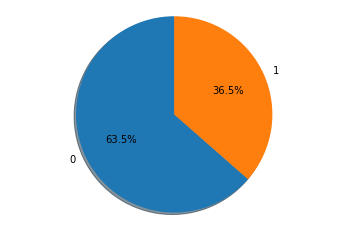

In [31]:
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


print("Customer attrition in data")
#labels
labels = data['CHURNED'].value_counts().keys().tolist()

#values
values = data['CHURNED'].value_counts().values.tolist()
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Home price distribution in customer attrition (less than 600k)
Churned customers


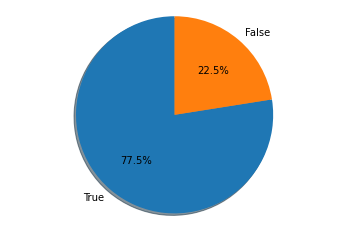

Non churned customers


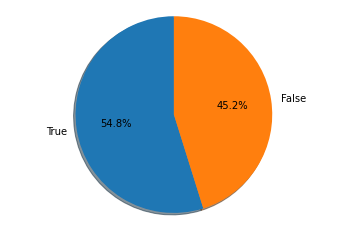

-----------------------------------------------------------------------------------
College degree distribution in customer attrition
Churned customers


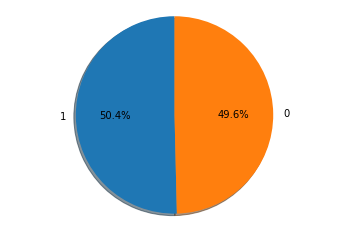

Non churned customers


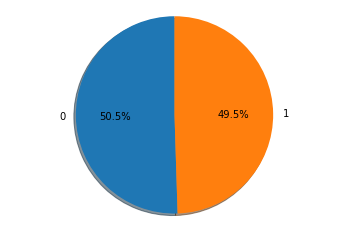

-----------------------------------------------------------------------------------
Quantity of children in customer attrition
Churned customers


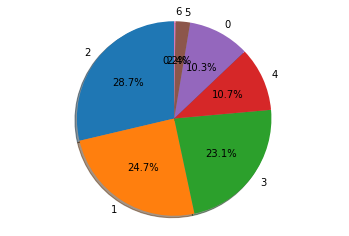

Quantity of children in customer attrition
Non churned customers


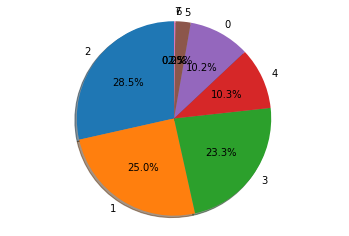

-----------------------------------------------------------------------------------
Job class distribution in customer attrition
Churned customers


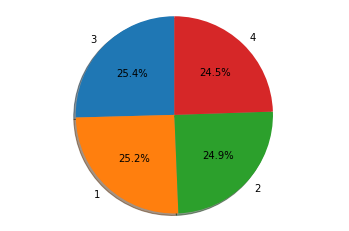

Job class distribution in customer attrition
Non churned customers


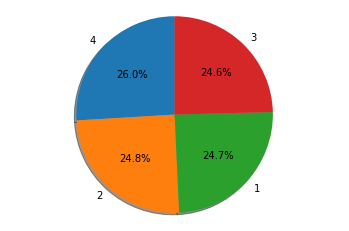

In [63]:
print("Home price distribution in customer attrition (less than 600k)")
print("Churned customers")
#labels
labels = data[data['CHURNED'] == 1]['LESSTHAN600k'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 1]['LESSTHAN600k'].value_counts().values.tolist()
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Non churned customers")
#labels
labels = data[data['CHURNED'] == 0]['LESSTHAN600k'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 0]['LESSTHAN600k'].value_counts().values.tolist()
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print("-----------------------------------------------------------------------------------")
print("College degree distribution in customer attrition")
print("Churned customers")
#labels
labels = data[data['CHURNED'] == 1]['COLLEGE'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 1]['COLLEGE'].value_counts().values.tolist()
explode = (0, 0)

fig1, ax2 = plt.subplots()
ax2.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Non churned customers")
#labels
labels = data[data['CHURNED'] == 0]['COLLEGE'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 0]['COLLEGE'].value_counts().values.tolist()
explode = (0, 0)

fig1, ax2 = plt.subplots()
ax2.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("-----------------------------------------------------------------------------------")
print("Quantity of children in customer attrition")
print("Churned customers")
#labels
labels = data[data['CHURNED'] == 1]['CHILD'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 1]['CHILD'].value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Quantity of children in customer attrition")
print("Non churned customers")
#labels
labels = data[data['CHURNED'] == 0]['CHILD'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 0]['CHILD'].value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("-----------------------------------------------------------------------------------")
print("Job class distribution in customer attrition")
print("Churned customers")
#labels
labels = data[data['CHURNED'] == 1]['JOB_CLASS'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 1]['JOB_CLASS'].value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Job class distribution in customer attrition")
print("Non churned customers")
#labels
labels = data[data['CHURNED'] == 0]['JOB_CLASS'].value_counts().keys().tolist()

#values
values = data[data['CHURNED'] == 0]['JOB_CLASS'].value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [61]:
data.dtypes
(data[data['CHURNED'] == 1]['REPORTED_SATISFACTION'] >= 0).value_counts().keys().tolist()

[False, True]

-----------------------------------------------------------------------------------
Reported satisfaction in customer attrition
Churned customers


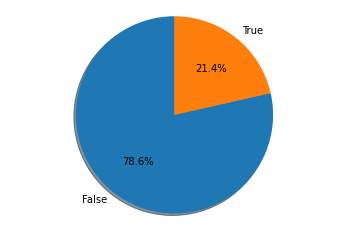

Reported satisfaction in customer attrition
Non churned customers


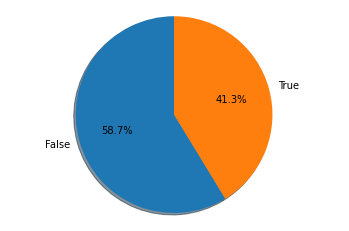

-----------------------------------------------------------------------------------
Reported usage level in customer attrition
Churned customers


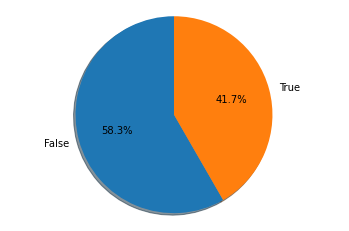

Reported usage level in customer attrition
Non churned customers


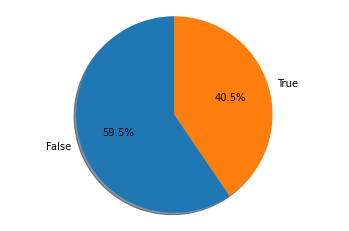

-----------------------------------------------------------------------------------
Considering change of plan in customer attrition
Churned customers


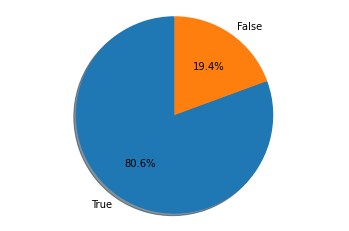

Considering change of plan in customer attrition
Non churned customers


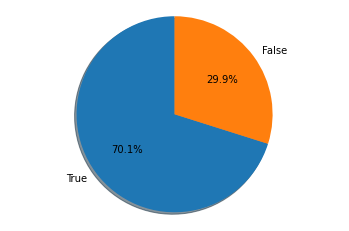

In [64]:
print("-----------------------------------------------------------------------------------")
print("Reported satisfaction in customer attrition")
print("Churned customers")
#labels
labels = (data[data['CHURNED'] == 1]['REPORTED_SATISFACTION'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 1]['REPORTED_SATISFACTION'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Reported satisfaction in customer attrition")
print("Non churned customers")
#labels
labels = (data[data['CHURNED'] == 0]['REPORTED_SATISFACTION'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 0]['REPORTED_SATISFACTION'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("-----------------------------------------------------------------------------------")
print("Reported usage level in customer attrition")
print("Churned customers")
#labels
labels = (data[data['CHURNED'] == 1]['REPORTED_USAGE_LEVEL'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 1]['REPORTED_USAGE_LEVEL'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Reported usage level in customer attrition")
print("Non churned customers")
#labels
labels = (data[data['CHURNED'] == 0]['REPORTED_USAGE_LEVEL'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 0]['REPORTED_USAGE_LEVEL'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("-----------------------------------------------------------------------------------")
print("Considering change of plan in customer attrition")
print("Churned customers")
#labels
labels = (data[data['CHURNED'] == 1]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 1]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Considering change of plan in customer attrition")
print("Non churned customers")
#labels
labels = (data[data['CHURNED'] == 0]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 0]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [18]:
data

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,0,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,-2,-1,1,0
1,C100001,1,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,-1,-1,1,1
2,C100006,0,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,0,-2,1,0
3,C100008,0,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,-1,2,1,1
4,C100010,1,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,-2,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,C115967,1,829.787234,40567.0,41,7,458723.0,True,0,4,128.0,305,5,3.9,4,0,-1,2,0
11977,C115968,0,723.529412,75007.5,70,0,328171.0,True,3,1,199.0,610,5,4.1,13,-1,-1,2,1
11978,C115970,0,80.000000,77674.5,0,80,439967.0,True,3,1,94.0,750,1,1.4,1,-1,-1,2,1
11979,C115972,0,77.777778,37730.5,0,17,795808.0,False,3,1,142.0,284,0,1.7,8,-2,-1,1,0


In [67]:
print("-----------------------------------------------------------------------------------")
print("Considering change of plan in customer attrition")
print("Churned customers")
#labels
labels = (data[data['CHURNED'] == 1]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 1]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print("Considering change of plan in customer attrition")
print("Non churned customers")
#labels
labels = (data[data['CHURNED'] == 0]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().keys().tolist()

#values
values = (data[data['CHURNED'] == 0]['CONSIDERING_CHANGE_OF_PLAN'] >= 0).value_counts().values.tolist()
explode = [0] * len(values)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

'CUSTOMER_ID'

Feature ranking:
1. feature DATA (0.082526)
2. feature INCOME (0.081593)
3. feature HANDSET_PRICE (0.075035)
4. feature COLLEGE (0.073604)
5. feature LEFTOVER (0.072610)
6. feature REVENUE (0.068185)
7. feature AVERAGE_CALL_DURATION (0.066849)
8. feature OVERCHARGE (0.060965)
9. feature TIME_CLIENT (0.058859)
10. feature OVER_15MINS_CALLS_PER_MONTH (0.055618)
11. feature JOB_CLASS (0.052392)
12. feature REPORTED_SATISFACTION (0.045980)
13. feature LESSTHAN600k (0.045816)
14. feature REPORTED_USAGE_LEVEL (0.045486)
15. feature HOUSE (0.045168)
16. feature CHILD (0.042080)
17. feature CUSTOMER_ID (0.027233)


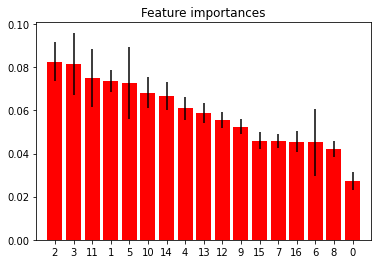

In [68]:

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X = data[['COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE',
       'LESSTHAN600k', 'CHILD', 'JOB_CLASS',
       'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN']]

y = data['CHURNED']

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Data preparation

In [4]:
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE


data = data.dropna()
X = data[['COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE',
       'LESSTHAN600k', 'CHILD', 'JOB_CLASS',
       'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN']]

y = data['CHURNED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)
sm = SMOTE(random_state=42, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Quick analysis

In [ ]:
# Quick check of some models in order to find out which one we could tune
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_score, \
recall_score
import warnings

warnings.filterwarnings("ignore")


def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtrain, ytrain), model.score(xtest, ytest)


def quick_test_a_few_times(model, X, y, n=10):
    return (pd.DataFrame([quick_test(model, X, y) for j in range(n)],
                         columns=['Train Acc', 'Test Acc'])).mean()


def get_scores(mod, label, X_train, y_train, X_test, y_test):
    mod = mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)

    print(f'**Model: {label}**')
    print(f'Train accuracy: {round(mod.score(X_train, y_train), 4)}')
    print(f'Test accuracy: {round(mod.score(X_test, y_test), 4)}')
    print(f'Precision: {round(precision_score(y_test, predictions), 4)}')
    print(f'Recall: {round(recall_score(y_test, predictions), 4)}')
    print()
    #print(classification_report(y_test, predictions))
    #print()

def evaluate_models(model_types: list, X_train, y_train, X_test, y_test):
    for model in model_types:
        m = model['model']
        label = model['label']
        quick_test_a_few_times(m, X_train, y_train)
        get_scores(m, label, X_train, y_train, X_test, y_test)


models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(),
    },
    {
        'label': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
    },
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier(),
    },
    {
        'label': 'AdaBoost Classifier',
        'model': AdaBoostClassifier(),
    },
    {
        'label': 'Decision Tree Classifier',
        'model': DecisionTreeClassifier(),
    },
    #{
    #    'label': 'Linear Support Vector Classifier',
    #    'model': LinearSVC(),
    #},
    ##{ 
    ##    'label': 'SVC with rbf kernel',
    #    'model':  SVC(kernel='rbf'),
    #},
    #{
    #    'label': 'SVC with Polynomial kernel',
    #    'model':  SVC(kernel='poly'),
    #},
    {
        'label': 'Naive Bayes Classifier',
        'model':  GaussianNB(),
    }
]

evaluate_models(models, X_train_res, y_train_res, X_test, y_test)

# TODO add some other models

**Model: Logistic Regression**
Train accuracy: 0.649
Test accuracy: 0.6539
Precision: 0.5197
Recall: 0.6892

**Model: Gradient Boosting**
Train accuracy: 0.8409
Test accuracy: 0.7769
Precision: 0.6885
Recall: 0.7104

**Model: Random Forest**
Train accuracy: 0.9915
Test accuracy: 0.7448
Precision: 0.6737
Recall: 0.584

**Model: AdaBoost Classifier**
Train accuracy: 0.7911
Test accuracy: 0.7258
Precision: 0.6144
Recall: 0.6689

**Model: Decision Tree Classifier**
Train accuracy: 1.0
Test accuracy: 0.6944
Precision: 0.5761
Recall: 0.6178

**Model: Naive Bayes Classifier**
Train accuracy: 0.6273
Test accuracy: 0.6412
Precision: 0.5075
Recall: 0.5888



# ROC curve 

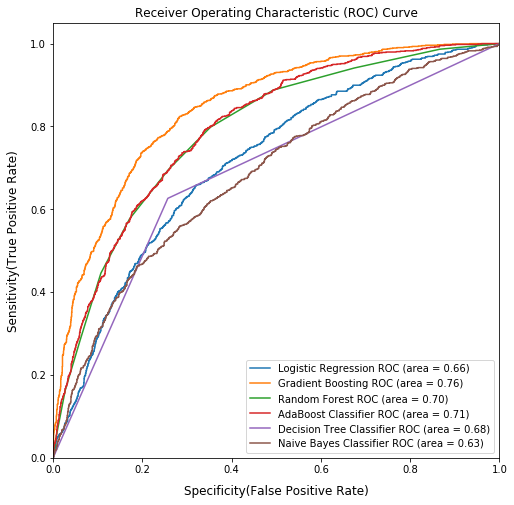

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 8))

# Iterate through the list of models
for m in models:
    model = m['model']  # select the model
    model.fit(X_train_res, y_train_res)  # train the model
    y_pred = model.predict(X_test)  # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test, model.predict(X_test))
    # Plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)', fontsize=12, labelpad=10)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=12, labelpad=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12)
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_curve.jpg', dpi=300)

# Generating the final csv

# Tuning the models
So we start analysing the parameters of the chosen models


## Tuning the logistic regression model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold

tuned_models = {}
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
param_grid = [{'clf__C': [0.1, 0.8, 1, 1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 1.8, 1.9, 5, 10],
               'clf__class_weight': [None, 'balanced'],
               'clf__solver': ['liblinear', 'sag', 'saga']}]
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='recall')
gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn

In [ ]:
print(gs.best_score_)
print(np.median(gs.cv_results_['mean_test_score']))
pred2 = gs.predict(X_train)
print(classification_report(y_train, pred2))
tuned_models['Logistic Regression'] = gs

0.7242592592592593
0.7242592592592593
              precision    recall  f1-score   support

           0       0.82      0.70      0.75      5400
           1       0.58      0.73      0.64      3109

    accuracy                           0.71      8509
   macro avg       0.70      0.71      0.70      8509
weighted avg       0.73      0.71      0.71      8509



## Gradient boosting tuning

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', GradientBoostingClassifier())])
param_grid = [{'clf__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1], 'clf__loss': ['deviance', 'exponential'],
               'clf__n_estimators': [50, 100, 150], 'clf__max_depth': [2, 3, 4]}]
gs = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='recall')
gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
  

In [ ]:
print(gs.best_score_)
print(np.median(gs.cv_results_['mean_test_score']))
pred2 = gs.predict(X_train)
print(classification_report(y_train, pred2))
tuned_models['Gradient Boosting'] = gs

0.7977777777777778
0.7853703703703704
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5400
           1       0.88      0.85      0.87      3109

    accuracy                           0.90      8509
   macro avg       0.90      0.89      0.90      8509
weighted avg       0.90      0.90      0.90      8509



## Random Forest Tuning


In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])
param_grid = [{'clf__max_depth': [4, 5, 6], 'clf__max_features': [5, 10, 15], 'clf__n_estimators': [50, 100, 150]}]
gs = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='recall')
gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

In [ ]:
print(gs.best_score_)
print(np.median(gs.cv_results_['mean_test_score']))
pred2 = gs.predict(X_train)
print(classification_report(y_train, pred2))
tuned_models['Random Forest'] = gs

0.7994444444444444
0.7737037037037037
              precision    recall  f1-score   support

           0       0.85      0.74      0.80      5400
           1       0.64      0.78      0.70      3109

    accuracy                           0.76      8509
   macro avg       0.75      0.76      0.75      8509
weighted avg       0.77      0.76      0.76      8509



## Adaboost tuning

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', AdaBoostClassifier())])
param_grid = [{'clf__learning_rate': [0.01, 0.1, 0.5, 1, 1.1, 1.2], 'clf__algorithm': ['SAMME'], 'clf__n_estimators': [25, 50, 100]}]
gs = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='recall')
gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_estimators=50,
                                                           random_state=None))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'clf__algorithm': ['SAMME'],
                          'clf__learning_rate': [0.01, 0.1, 0.5

In [ ]:
print(gs.best_score_)
print(np.median(gs.cv_results_['mean_test_score']))
pred4 = gs.predict(X_train)
print(classification_report(y_train, pred4))
tuned_models[ 'AdaBoost Classifier'] = gs

0.9466666666666667
0.7553703703703704
              precision    recall  f1-score   support

           0       0.84      0.25      0.39      5400
           1       0.41      0.92      0.57      3109

    accuracy                           0.50      8509
   macro avg       0.63      0.58      0.48      8509
weighted avg       0.68      0.50      0.45      8509



## Decision tree tuning

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())])
param_grid = [{'clf__max_depth': [4, 5, 6], 'clf__max_features': [5, 10, 15]}]
gs = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='recall')
gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
           

In [ ]:
print(gs.best_score_)
print(np.median(gs.cv_results_['mean_test_score']))
pred2 = gs.predict(X_train)
print(classification_report(y_train, pred2))
tuned_models['Decision Tree Classifier'] = gs

0.7842592592592592
0.7403703703703703
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      5400
           1       0.59      0.77      0.67      3109

    accuracy                           0.72      8509
   macro avg       0.72      0.73      0.71      8509
weighted avg       0.75      0.72      0.73      8509



# ROC curve for tuned models

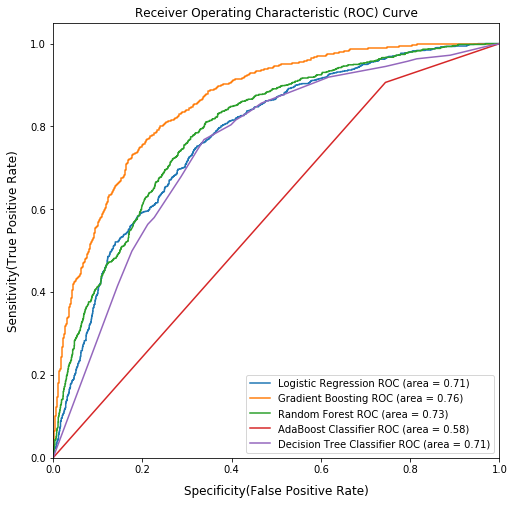

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 8))

# Iterate through the list of models
for label, model in tuned_models.items():
    #model = m['model']  # select the model
    #model.fit(X_train_res, y_train_res)  # train the model
    y_pred = model.predict(X_test)  # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test, model.predict(X_test))
    # Plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label, auc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)', fontsize=12, labelpad=10)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=12, labelpad=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12)
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_curve_tuned.jpg', dpi=300)

# Predicting the price 
We would search for each client the discount what will maximaze the expected value of revenue (including overcharge)
So we chose the Gradient Boosting model as it predicts our data the best

In [ ]:
df = pd.read_csv('validation.csv')
df = df.fillna(method='ffill')


df['COLLEGE'] = df['COLLEGE'].replace('zero', 0)
df['COLLEGE'] = df['COLLEGE'].replace('one', 1)

transform_dict = {'REPORTED_SATISFACTION':{'very_unsat': -2, 'unsat': -1, 'avg': 0, 'sat': 1, 'very_sat': 2}, 
                  'REPORTED_USAGE_LEVEL': {'very_little': -2, 'little': -1, 'avg': 0, 'high': 1, 'very_high': 2},
                  'CONSIDERING_CHANGE_OF_PLAN' : {'never_thought': -2, 'no': -1, 'perhaps': 0, 
                                                  'considering': 1, 'actively_looking_into_it': 2}}

for key in transform_dict.keys():
    df[key] = df[key].map(transform_dict[key])
    
X_val =  df.drop('CUSTOMER_ID', axis=1)
model = tuned_models['Gradient Boosting']
y_pred = model.predict(X_val)
df.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,1,80.000000,45452.5,75,65,342741.0,True,3,1,149.0,300,3,2.2,2,-1,-1,1
1,C100003,0,536.842105,40703.5,90,0,215904.0,True,1,1,176.0,384,4,2.4,13,-1,2,2
2,C100004,0,256.578947,35563.0,52,0,341828.0,True,2,3,124.0,371,5,2.3,12,2,0,1
3,C100005,0,466.666667,66072.5,0,8,257222.0,True,3,1,279.0,324,1,2.8,5,2,-2,2
4,C100007,0,150.000000,21901.5,0,0,800811.0,False,1,3,128.0,164,1,1.5,12,0,2,0


So, the per cent of clients that will not churn:

In [ ]:
1 - sum(y_pred)/len(y_pred)

0.6629100926621587

In [ ]:
discounts = []
gains = []
should_contacts = []
    
for index, client in df.iterrows():
    client = client.drop('CUSTOMER_ID')
    rev = client['REVENUE']
    over = client['OVERCHARGE']

    discount_vals = np.linspace(0, rev, 101)
    disc_max = 0
    max_e = 0
    for discount in discount_vals:
        client['REVENUE'] = rev - discount
        client_val = client.values.reshape(1, -1)
        client_proba = model.predict_proba(client_val)
        gain = client_proba[0][0] * (rev + over) - discount
        if discount != 0:
            gain -= 10
        if gain > max_e:
            max_e = gain
            disc_max = discount
        
    if disc_max == 0:
        discount_vals = np.linspace(0, over, 101)

        for discount in discount_vals:
            client['REVENUE'] = 0
            client['OVERCHARGE'] = over - discount
            client_val = client.values.reshape(1, -1)
            client_proba = model.predict_proba(client_val)
            gain = client_proba[0][0] * (over) -  discount
            if discount != 0:
                gain -= 10
            if gain > max_e:
                max_e = gain
                disc_max = discount

               
    discounts.append(disc_max)
    gains.append(max_e)
    

In [ ]:
should_contacts = [0 if disc == 0 else 1 for disc in discounts]
df['DISCOUNT'] = discounts
df['CLIENT_TO_CONTACT'] = should_contacts


And the per cent of clients that will not churn after discounts:

In [ ]:
(len(y_pred) - sum(y_pred) + sum(should_contacts))/len(y_pred)

0.7385424492862509

In [ ]:
df['CHURN_LABEL'] = y_pred
df['CHURN_LABEL'] = df['CHURN_LABEL'].replace(1, 'LEAVE')
df['CHURN_LABEL'] = df['CHURN_LABEL'].replace(0, 'STAY')

proba = model.predict_proba(X_val)[:, 1]
df['CHURN_PROBABILITY'] = proba
df['CLIENT_TO_CONTACT'] = df['CLIENT_TO_CONTACT'].replace(1, 'YES')
df['CLIENT_TO_CONTACT'] = df['CLIENT_TO_CONTACT'].replace(0, 'NO')
df.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,...,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,DISCOUNT,CLIENT_TO_CONTACT,CHURN_LABEL,CHURN_PROBABILITY
0,C100002,1,80.000000,45452.5,75,65,342741.0,True,3,1,...,3,2.2,2,-1,-1,1,0.0,NO,LEAVE,0.767841
1,C100003,0,536.842105,40703.5,90,0,215904.0,True,1,1,...,4,2.4,13,-1,2,2,0.0,NO,LEAVE,0.557439
2,C100004,0,256.578947,35563.0,52,0,341828.0,True,2,3,...,5,2.3,12,2,0,1,0.0,NO,STAY,0.008556
3,C100005,0,466.666667,66072.5,0,8,257222.0,True,3,1,...,1,2.8,5,2,-2,2,0.0,NO,STAY,0.006468
4,C100007,0,150.000000,21901.5,0,0,800811.0,False,1,3,...,1,1.5,12,0,2,0,0.0,NO,STAY,0.000261


In [ ]:
save_df = df[['CUSTOMER_ID', 'CHURN_PROBABILITY', 'CHURN_LABEL', 'CLIENT_TO_CONTACT', 'DISCOUNT']]
save_df = save_df.sort_values(by=['CHURN_PROBABILITY'], ascending=False)
save_df.head()

,CUSTOMER_ID,CHURN_PROBABILITY,CHURN_LABEL,CLIENT_TO_CONTACT,DISCOUNT
2203,C108850,0.999609,LEAVE,NO,0.0
3561,C114192,0.999350,LEAVE,NO,0.0
2604,C110467,0.999325,LEAVE,NO,0.0
190,C100748,0.999272,LEAVE,NO,0.0
1406,C105620,0.999261,LEAVE,NO,0.0


In [ ]:
save_df.to_csv('result.csv')